# Text normalization using Gensim

In this notebook we will load and preprocess the data from the `six_thousand_tweets.csv` file using the normalization techniques we talked about in the lecture.

In [ ]:
# Importing the libraries
import pandas as pd
from gensim.utils import simple_preprocess
import nltk
nltk.download("wordnet")
nltk.download("stopwords")
from nltk import WordNetLemmatizer
from wordcloud import WordCloud

## Loading up the data

Upload the `six_thousand_tweets.csv` file to this environment, and load it up using Pandas.

In [ ]:
tweets = pd.read_csv("six_thousand_tweets.csv")

In [ ]:
tweets.head()

,target,id,date,flag,user,text
0,1,2016870232,Wed Jun 03 07:29:40 PDT 2009,NO_QUERY,nni,At home and watching Ellen - after a quite lon...
1,1,1676536826,Fri May 01 22:20:41 PDT 2009,NO_QUERY,seventy5,@thehulkster thanx
2,0,1966973215,Fri May 29 18:44:24 PDT 2009,NO_QUERY,jeffgignac,@lrobertsglobal I voted many times for BTO TCO...
3,0,1974659772,Sat May 30 13:35:08 PDT 2009,NO_QUERY,Chris_Yu,FYI - Wonderland's water WILL infect your pier...
4,0,1995291970,Mon Jun 01 13:15:26 PDT 2009,NO_QUERY,MandaaRiess,@shineonmedia There's something wrong with you...


The column `target` represents whether the tweet is saying something "positive" or something "negative".

## Removing usernames and hashtags

For the purposes of the analysis we plan to do, let's remove all usernames (i.e. all strings that contain an `@`)

In [ ]:
def clean_usernames(tweet_text):
  words = tweet_text.split()
  clean_words = [w for w in words if not ("@" in w or "#" in w)]
  return " ".join(clean_words)

In [ ]:
tweets["clean_text"] = tweets["text"].map(clean_usernames)

In [ ]:
# Sanity check.
for t in tweets["clean_text"]:
  if "@" in t:
    print(t)
  
  if "#" in t:
    print(t)

## Tokenizing

We will use a library called `gensim`. `gensim` comes with a series of utilities, and among them is a simple tokenizer:

In [ ]:
preprocessed_texts = [
    simple_preprocess(t) for t in tweets["clean_text"]
]

In [ ]:
for text, clean_text in zip(tweets["text"].iloc[:5], preprocessed_texts[:5]):
  print(text, clean_text)

At home and watching Ellen - after a quite long time!  ['at', 'home', 'and', 'watching', 'ellen', 'after', 'quite', 'long', 'time']
@thehulkster thanx  ['thanx']
@lrobertsglobal I voted many times for BTO TCOB  o would have gone to nuit blanche for TCOB. Oh well ['voted', 'many', 'times', 'for', 'bto', 'tcob', 'would', 'have', 'gone', 'to', 'nuit', 'blanche', 'for', 'tcob', 'oh', 'well']
FYI - Wonderland's water WILL infect your piercings.  ['fyi', 'wonderland', 'water', 'will', 'infect', 'your', 'piercings']
@shineonmedia There's something wrong with your site. It's not letting me go on it. It said its temporarily unavailable  ['there', 'something', 'wrong', 'with', 'your', 'site', 'it', 'not', 'letting', 'me', 'go', 'on', 'it', 'it', 'said', 'its', 'temporarily', 'unavailable']


## Lemmatizing

For lemmatizing, we can use several different tools:
- The neural networks inside SpaCy...
- NLTK and its lemmatizing utilities...

For now, we will use `NLTK`'s WordNet lemmatizer

In [ ]:
import nltk
nltk.download("wordnet")
nltk.download("stopwords")

from nltk import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
lemmatizer = WordNetLemmatizer()
corpus = [
  [lemmatizer.lemmatize(token) for token in doc] for doc in preprocessed_texts
]

In [ ]:
for text, doc in zip(tweets["text"].iloc[:5], corpus[:5]):
  print(text, doc)

At home and watching Ellen - after a quite long time!  ['at', 'home', 'and', 'watching', 'ellen', 'after', 'quite', 'long', 'time']
@thehulkster thanx  ['thanx']
@lrobertsglobal I voted many times for BTO TCOB  o would have gone to nuit blanche for TCOB. Oh well ['voted', 'many', 'time', 'for', 'bto', 'tcob', 'would', 'have', 'gone', 'to', 'nuit', 'blanche', 'for', 'tcob', 'oh', 'well']
FYI - Wonderland's water WILL infect your piercings.  ['fyi', 'wonderland', 'water', 'will', 'infect', 'your', 'piercings']
@shineonmedia There's something wrong with your site. It's not letting me go on it. It said its temporarily unavailable  ['there', 'something', 'wrong', 'with', 'your', 'site', 'it', 'not', 'letting', 'me', 'go', 'on', 'it', 'it', 'said', 'it', 'temporarily', 'unavailable']


## Removing stopwords

For this particular application (which is just a visualization of positive and negative tweets), let's remove the stopwords.

**Each library has its own family of stopwords.** In this example we will use the list inside NLTK.

In [ ]:
english_stopwords = set(nltk.corpus.stopwords.words("english"))

In [ ]:
corpus = [
   [word for word in doc if word not in english_stopwords] for doc in corpus
]

In [ ]:
corpus_positive = [
    doc for i, doc in enumerate(corpus) if tweets.loc[i, "target"] == 1
]

corpus_negative = [
    doc for i, doc in enumerate(corpus) if tweets.loc[i, "target"] == 0
]

## Visualizing the tweets using wordclouds

In [ ]:
def count_words(corpus):
  """
  Returns {word: frequency} for all words in
  all documents of the corpus.
  """
  counts = {}
  for doc in corpus:
    for word in doc:
      if word not in counts:
        counts[word] = 1
      else:
        counts[word] += 1
  
  return counts

A wordcloud is a great tool for visualizing words in terms of their frequency.

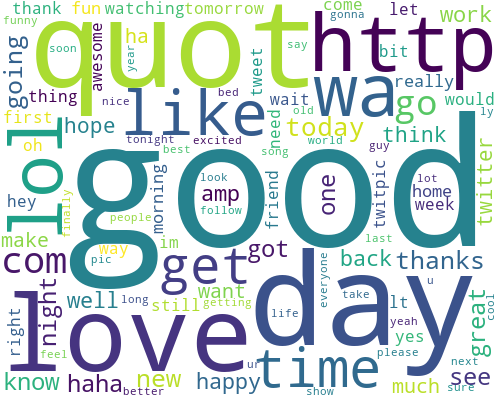

In [ ]:
from wordcloud import WordCloud
positive_counts = count_words(corpus_positive)
negative_counts = count_words(corpus_negative)

wordcount = WordCloud(
    background_color="white",
    max_words=100,
    width=500,
    height=400).generate_from_frequencies(positive_counts)
wordcount.to_image()

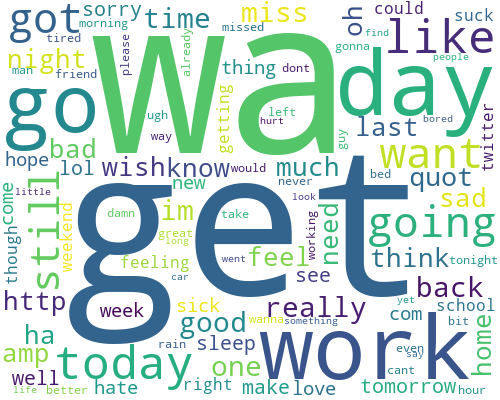

In [ ]:
wordcount = WordCloud(
    background_color="white",
    max_words=100,
    width=500,
    height=400).generate_from_frequencies(negative_counts)
wordcount.to_image()

Notice how some of the words there (like `wa`, `http`, `com`...) **shouldn't** belong there. We can remove than by re-running the whole process after **adding** them to the stopwords! 